## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [2]:
pip install tensorflow-gpu

     |████████████████████████████████| 81kB 5.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [69]:
import tensorflow as tf
print(tf.__version__)
#From tensorflow v2.0 onwards, Eager Execution will be enabled by default

2.0.0


In [0]:
tf.random.set_seed(42)

In [0]:
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [74]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [75]:
print("No. of sample in x_train: ", x_train.shape[0])
print("No. of sample in x_test: ",x_test.shape[0])

No. of sample in x_train:  60000
No. of sample in x_test:  10000


###5. Find dimensions of an image in the dataset

Dimensions of an Image:  (28, 28)


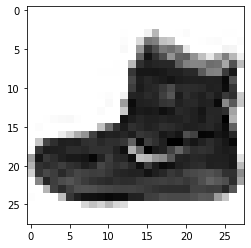

In [76]:
print("Dimensions of an Image: ",x_train.shape[1:3])
plt.figure()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.grid(False)
plt.show()

### 6. Verify if existing labels/Classes are correct 

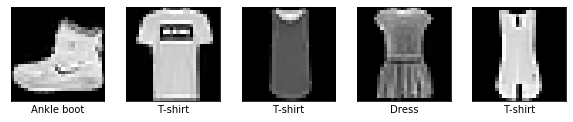

In [77]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_OH = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_OH = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [79]:
print(y_train_OH.shape)
print(y_test_OH.shape)

(60000, 10)
(10000, 10)


###8. Normalize both the train and test image data from 0-255 to 0-1

To normalise both the test and train images, Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

In [80]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
print('Normalization Done')

Normalization Done


###Now we have x_train_norm, y_train_OH, x_test_norm & y_test_OH for utilising for model building.

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [81]:
x_train_norm_reshaped = tf.keras.backend.expand_dims(x_train_norm, axis=-1).numpy()
x_train_norm_reshaped.shape

(60000, 28, 28, 1)

In [82]:
x_test_norm_reshaped = tf.keras.backend.expand_dims(x_test_norm, axis=-1).numpy()
x_test_norm_reshaped.shape

(10000, 28, 28, 1)

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
tf.keras.backend.clear_session()

#Initialize model
model = Sequential()

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                 kernel_size=(3,3), #Size of the filter
                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(Flatten())

#Dense 1st layer
model.add(Dense(128, activation='relu'))

#Dense 2nt layer
model.add(Dense(30, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))


###Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Train the model

In [86]:
#Train the model
model.fit(x_train_norm_reshaped,y_train_OH, validation_data=(x_test_norm_reshaped,y_test_OH), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3971 - accuracy: 0.8581 - val_loss: 0.3033 - val_accuracy: 0.8927
Epoch 2/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2468 - accuracy: 0.9086 - val_loss: 0.2938 - val_accuracy: 0.8902
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1842 - accuracy: 0.9315 - val_loss: 0.2528 - val_accuracy: 0.9107
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1313 - accuracy: 0.9514 - val_loss: 0.2537 - val_accuracy: 0.9190
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0925 - accuracy: 0.9659 - val_loss: 0.2821 - val_accuracy: 0.9154
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0635 - accuracy: 0.9766 - val_loss: 0.3081 - val_accuracy: 0.9145
Epoch 7/10
60000/60000 [==========================

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4718720   
_________________________________________________________________
dense_1 (Dense)              multiple                  3870      
_________________________________________________________________
dense_2 (Dense)              multiple                  310       
Total params: 4,741,716
Trainable params: 4,741,716
Non-trainable params: 0
______________________________________________

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()

#Initialize model
model1 = Sequential()

#Add first convolutional layer
model1.add(Conv2D(32, #Number of filters 
                 kernel_size=(3,3), #Size of the filter
                 activation='relu'))

#Add second convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model1.add(MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model1.add(Dropout(0.25))

#Flatten the output
model1.add(Flatten())

#Dense 1st layer
model1.add(Dense(128, activation='relu'))

#Dense 2nt layer
model1.add(Dense(30, activation='relu'))

#Output layer
model1.add(Dense(10, activation='softmax'))


###Compile the model

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Train the model

In [90]:
model1.fit(x_train_norm_reshaped,y_train_OH, validation_data=(x_test_norm_reshaped,y_test_OH), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3977 - accuracy: 0.8583 - val_loss: 0.2878 - val_accuracy: 0.8995
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2520 - accuracy: 0.9067 - val_loss: 0.2876 - val_accuracy: 0.8966
Epoch 3/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2043 - accuracy: 0.9246 - val_loss: 0.2338 - val_accuracy: 0.9148
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1669 - accuracy: 0.9370 - val_loss: 0.2255 - val_accuracy: 0.9231
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1395 - accuracy: 0.9477 - val_loss: 0.2303 - val_accuracy: 0.9228
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1146 - accuracy: 0.9574 - val_loss: 0.2456 - val_accuracy: 0.9204
Epoch 7/10
60000/60000 [==========================

In [91]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1179776   
_________________________________________________________________
dense_1 (Dense)              multiple                  3

###13. Verify accuracy of the model

> 

In [92]:
model.evaluate(x_test_norm_reshaped,y_test_OH)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5065423197820783, 0.9125]

In [93]:
model1.evaluate(x_test_norm_reshaped,y_test_OH)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33406171172000465, 0.9204]

####14. Verify performance of your model selectively 

In [0]:
predictions = model1.predict(x_train_norm_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='white')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

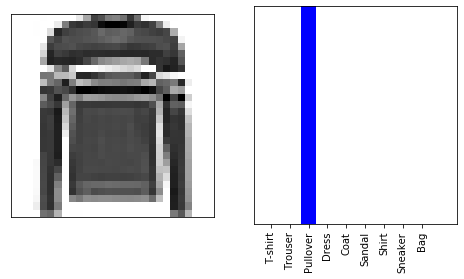

In [99]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

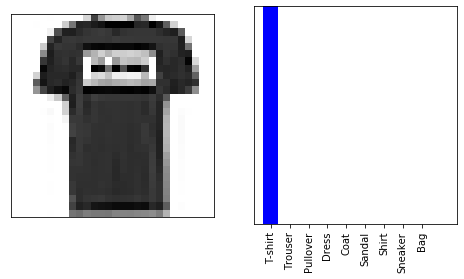

In [101]:
#Replace value of i with other index to check other product
i = 1
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True, rotation_range=5)
datagen.fit(x_train_norm_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

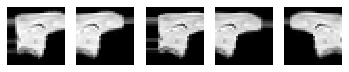

In [103]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_norm_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()